In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

from math import sqrt, pi

%matplotlib inline
from matplotlib import *

In [8]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)
init_gate = Initialize(psi)
init_gate.label = "init"

NameError: name 'random_statevector' is not defined

In [7]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw()

NameError: name 'init_gate' is not defined

In [3]:
simulator = Aer.get_backend('aer_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3131ce89a0>"'

In [4]:
circuit.save_statevector()   # Tell simulator to save statevector
qobj = assemble(circuit)     # Create a Qobj from the circuit for the simulator to run
result = simulator.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.57735027+0.j 0.        +0.j 0.        +0.j 0.81649658+0.j]


/home/joey/.local/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


In [5]:
result = simulator.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.57735027+0.j 0.        +0.j 0.        +0.j 0.81649658+0.j]


/home/joey/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


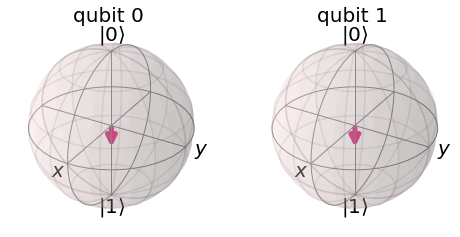

In [6]:
plot_bloch_multivector(out_state)